In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import codac as cdc
from codac.datastore import client
import sys
sys.path.append('/home/jleland/Coding/Projects/flopter')
import external.magnumdbutils as ut

In [2]:
db = client.connect('127.0.0.1')
raw_data = db.root.chDir('_Raw')

time_range = ut.make_time_range(start_str='2018-05-01 09:00:00', duration=ut.get_hours(72))
plasma_states = ut.get_data_si(db, ut.PLASMA_STATE, time_range)
pulse_b_inds = []
time_ranges = []

for i in range(len(plasma_states[ut.DATA])):
    state = plasma_states[ut.DATA][i]
    if state != 18:
        continue
    pulse_b_inds.append(i)
    starttime = plasma_states[ut.TIMES][i]
    endtime = plasma_states[ut.TIMES][i+1]
    time_ranges.append(client.TimeRange(starttime, endtime))
    print("{}) {}: {} - {} ({} seconds)"
          .format(len(pulse_b_inds), 
                  ut.human_date_str(starttime), 
                  ut.human_time_str(starttime),
                  ut.human_time_str(endtime), 
                  client.timetoposix(endtime - starttime)))


1) 2018-05-01: 11:34:19 - 11:34:20 (1.0 seconds)
2) 2018-05-01: 11:45:48 - 11:45:49 (1.0 seconds)
3) 2018-05-01: 11:55:32 - 11:55:33 (1.0 seconds)
4) 2018-05-01: 12:28:02 - 12:28:03 (1.0 seconds)
5) 2018-05-01: 12:31:40 - 12:31:41 (1.0 seconds)
6) 2018-05-01: 12:45:17 - 12:45:18 (1.0 seconds)
7) 2018-05-01: 12:56:16 - 12:56:17 (1.0 seconds)
8) 2018-05-01: 13:09:43 - 13:09:53 (10.0 seconds)
9) 2018-05-01: 13:32:03 - 13:32:13 (10.0 seconds)
10) 2018-05-01: 13:36:38 - 13:36:48 (10.0 seconds)
11) 2018-05-01: 13:44:03 - 13:44:23 (20.0 seconds)
12) 2018-05-01: 15:31:43 - 15:31:53 (10.0 seconds)
13) 2018-05-01: 15:34:13 - 15:34:23 (10.0 seconds)
14) 2018-05-01: 15:37:20 - 15:37:30 (10.0 seconds)
15) 2018-05-01: 15:39:47 - 15:39:57 (10.0 seconds)
16) 2018-05-01: 15:42:02 - 15:42:12 (10.0 seconds)
17) 2018-05-01: 15:45:27 - 15:45:37 (10.0 seconds)
18) 2018-05-01: 15:47:52 - 15:48:02 (10.0 seconds)
19) 2018-05-01: 15:56:19 - 15:56:29 (10.0 seconds)
20) 2018-05-01: 15:59:08 - 15:59:18 (10.0 secon

In [3]:
for item in raw_data.ls():
    print(item)
    
ts_dens_prof = 'TsProfNe'
ts_dens_prof_d = 'TsProfNe_d'
ts_temp_prof = 'TsProfTe'
ts_temp_prof_d = 'TsProfTe_d'
ts_rad_coords = 'TsRadCoords'

Adc0TrigStartFt
AdcSrcCat1Current
AdcSrcCat1Volt
AdcSrcCatHouseVolt
AdcSrcPlate1Volt
AdcSrcPlate2Volt
AdcSrcPlate3Volt
AdcSrcPlate4Volt
AdcSrcPlate5Volt
AdcSrcPlate6Volt
AdcTargetCurrent
AdcTargetSkimmerVolt
AdcTargetVolt
AnodeFlowAr
AnodeFlowArO2
AnodeFlowD2
AnodeFlowH2
AnodeFlowHe
AnodeFlowMe
AnodeFlowN2
AnodeFlowNe
AnodeFlowXe
AvantesCh1Calibration
AvantesCh1Counts
AvantesCh1DarkCounts
AvantesCh1DelTime
AvantesCh1Description
AvantesCh1IntTime
AvantesCh1NrOfAvg
AvantesCh1SmoothPx
AvantesCh2Calibration
AvantesCh2Counts
AvantesCh2DarkCounts
AvantesCh2DelTime
AvantesCh2Description
AvantesCh2IntTime
AvantesCh2NrOfAvg
AvantesCh2SmoothPx
AvantesCh3Counts
AvantesCh3DarkCounts
AvantesCh3DelTime
AvantesCh3Description
AvantesCh3IntTime
AvantesCh3NrOfAvg
AvantesCh3SmoothPx
AvantesCh4Counts
AvantesCh4DarkCounts
AvantesCh4DelTime
AvantesCh4Description
AvantesCh4IntTime
AvantesCh4NrOfAvg
AvantesCh4SmoothPx
AvantesCh5Counts
AvantesCh5DarkCounts
AvantesCh5DelTime
AvantesCh5Description
AvantesCh5IntT

In [4]:
# def get_data(db, label, time_range, time_converter=None, ref_time=None):
#     db_var = db.findNode(label)[0]
#     data = db_var.read(time_range, 0, 0, unit=client.SI_UNIT)
#     if time_converter is not None and callable(time_converter):
#         data = [[time_converter(timestamp) for timestamp in data[ut.TIMES]], 
#                 data[ut.DATA]]
# #         for i, timestamp in enumerate(data[ut.TIMES]):
# #             temporary = time_converter(timestamp)
# #             data[ut.TIMES][i] = temporary
#     return data

def get_data(db, search_name, time_range, numpify_fl=True, time_converter=None):
    if time_converter is not None and callable(time_converter):
        ref_time = 6564319866763108260
        
    db_var = db.findNode(search_name)[0]  # only take the first in list
    time, data = db_var.read(time_range, 0, 0, unit=client.SI_UNIT)
    if ref_time:
        time = [client.timetoposix(timestamp - ref_time) for timestamp in time]
    if numpify_fl:
        data = np.asarray(data)
    return [time, data]

def get_between_dates(indices, reference, data):
    new_indices = []
    for index in indices:
        for i, time in enumerate(data[ut.TIMES]):
            if reference[ut.TIMES][index] <= time and reference[ut.TIMES][index+1] > time:
                new_indices.append(i)
    return new_indices

def get_day(timestamp):
    date_str = client.timetostring(int(timestamp) & 0xffffffff00000000).split()[0]
    return date_str.replace('-', ' ').split()[2]

def get_seconds(time):
    seconds = time >> 32
    sub_sec = str(time)[:-32]

def subtract_ref_time(time, ref_time=6564319866763108260):
    corrected_time = client.timetoposix(time - ref_time)
    return float(corrected_time)
    

In [5]:
# ts = 6564319866763108260
ts = 6564322614655263947
ts_2 = 6564321037878221702
duration = 40

print(ts >> 32)
print()
print(((ts_2 - ts)/(2**32)))
print(client.timetostring(ts))
# ts = 6564321037878221702
# duration = 20

1528375459

-367.12201364454813
2018-06-07 13:44:19.521837


6564322571705590987 13:44:09
6564322915302974667 13:45:29
Tar Tilt: [ -9.950582  -9.950571  -9.950562  -9.950551  -9.95054   -9.950488
  -9.950467  -9.979819 -10.003234 -10.003108 -10.000003  -9.999972
  -9.971028  -9.962948  -9.958233  -9.9563    -9.955693  -9.955641]
(2, 2) (2, 4) (2, 4) (2, 24)
2 4 4 24
lengths:     2 2 2 2 2
lengths[0]:  2 4 4 24 3


<IPython.core.display.Javascript object>


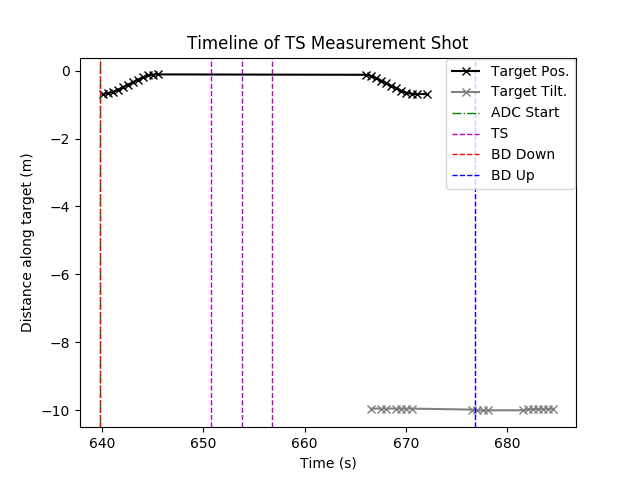

In [6]:
# MAGNUM DATA PLAYGROUND
ts_start = ts - ut.get_seconds(10)
ts_end = ts + ut.get_seconds(duration + 30)

tr = client.TimeRange(ts_start, ts_end)
print(ts_start, ut.human_time_str(ts_start))
print(ts_end, ut.human_time_str(ts_end))

tar_pos = get_data(db, ut.TARGET_POS, tr, time_converter=subtract_ref_time)
tar_tilt = get_data(db, ut.TARGET_TILT, tr, time_converter=subtract_ref_time)
tar_tilt[1] = tar_tilt[1] * (180/np.pi)
bdd = get_data(db, 'BeamDumpDown', tr, time_converter=subtract_ref_time)
bdu = get_data(db, 'BeamDumpUp', tr, time_converter=subtract_ref_time)
temp_prof = get_data(db, ts_temp_prof, tr, time_converter=subtract_ref_time)
rad_coords = get_data(db, ts_rad_coords, tr, time_converter=subtract_ref_time)
states = get_data(db, ut.PLASMA_STATE, tr, time_converter=subtract_ref_time)

print('Tar Tilt: {}'.format(tar_tilt[1]))
tar_tilt_mean = np.mean(tar_tilt[1])
print(np.shape(states), np.shape(bdd), np.shape(bdu), np.shape(tar_pos))
print(np.shape(states)[1], np.shape(bdd)[1], np.shape(bdu)[1], np.shape(tar_pos)[1])
print('lengths:    ', len(states), len(bdd), len(bdu), len(tar_pos), len(temp_prof))
print('lengths[0]: ', len(states[0]), len(bdd[0]), len(bdu[0]), len(tar_pos[0]), len(temp_prof[0]))
# print(states)
# print(bdd)
# print(bdu)
# print(tar_pos)
# print(temp_prof)

plt.figure()

plt.plot(tar_pos[0], tar_pos[1], 'x-', color='k', label='Target Pos.')
plt.plot(tar_tilt[0], tar_tilt[1], 'x-', color='gray', label='Target Tilt.')
plt.axvline(x=subtract_ref_time(ts), color='g', linewidth=1, linestyle='-.', label='ADC Start')
for k in range(len(temp_prof[0])):
    if k == 0:
        plt.axvline(x=temp_prof[0][k], color='m', linestyle='--', linewidth=1, label='TS')
    else:
        plt.axvline(x=temp_prof[0][k], color='m', linestyle='--', linewidth=1)
for i in range(np.shape(bdd)[1]):
    if bdd[1][i]:
        plt.axvline(x=bdd[0][i], color='r', linestyle='--', linewidth=1, label='BD Down')
    if bdu[1][i]:
        plt.axvline(x=bdu[0][i], color='b', linestyle='--', linewidth=1, label='BD Up')
# for j in range(np.shape(states)[1]):
#     plt.axvline(x=states[0][j], color='g', linestyle='--', linewidth=1)




        
# plt.axvline(x=client.timetoposix(ts_start), color='k', linewidth=1 )
# plt.axvline(x=client.timetoposix(ts_end), color='k', linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('Distance along target (m)')
plt.title('Timeline of TS Measurement Shot')
plt.legend(loc=1, borderaxespad=0.1)

# plt.figure()
# for l in range(len(temp_prof[0])):
#     plt.plot(rad_coords[ut.DATA][l], temp_prof[ut.DATA][l], label=temp_prof[ut.TIMES][l])
# plt.legend()

In [7]:
# progress on target_pos padding algorithm
from math import isclose

def is_roughly_equal(a, b, tolerance=.99):
    return (a * tolerance) <= b and (a * (1 + (1 - tolerance))) >= b
        

t, d = tar_pos
differ = np.diff(t)
interval = np.median(differ)
new_time = np.arange(t[0], t[-1] + interval, interval)
new_data = np.zeros(np.shape(new_time))

print(t[2], new_time[2], is_roughly_equal(t[2], new_time[2]))
print(len(t), len(new_time))
print(t)
print(new_time)
print()

j = 0
for i in range(len(new_time)):
    print(i, new_time[i], j)
    if is_roughly_equal(t[j], new_time[i]):
        new_data[i] = d[j]
        j += 1
    else:
        new_data[i] = d[j-1]

print()

for tt, dd in zip(t, d):
    print(tt, dd)
    
print()
    
for nt, nd in zip(new_time, new_data):
    print(nt, nd)
    
plt.figure()
plt.plot(t, d, 'x')
plt.plot(new_time, new_data, '.')

641.051661762 641.051661785 True
24 65
[640.05166176240891, 640.55166177358478, 641.05166176240891, 641.55166177358478, 642.05166176240891, 642.55166177358478, 643.05166176240891, 643.55166177358478, 644.05166176240891, 644.55166177358478, 645.05166176240891, 645.55166177358478, 666.05166176240891, 666.55166177358478, 667.05166176240891, 667.55166177358478, 668.05166176240891, 668.55166177358478, 669.05166176240891, 669.5416617738083, 670.04166176263243, 670.5416617738083, 671.04166176263243, 672.04166176263243]
[ 640.05166176  640.55166177  641.05166178  641.5516618   642.05166181
  642.55166182  643.05166183  643.55166184  644.05166185  644.55166186
  645.05166187  645.55166189  646.0516619   646.55166191  647.05166192
  647.55166193  648.05166194  648.55166195  649.05166196  649.55166197
  650.05166199  650.551662    651.05166201  651.55166202  652.05166203
  652.55166204  653.05166205  653.55166206  654.05166208  654.55166209
  655.0516621   655.55166211  656.05166212  656.55166213

IndexError: list index out of range

In [ ]:
from scipy.interpolate import interp1d

target_pos_func = interp1d(tar_pos[0], tar_pos[1])

lo = min(tar_pos[0])
hi = max(tar_pos[0])

t_range = np.linspace(lo, hi, 100)
grad = np.gradient(target_pos_func(t_range))
# slindex = grad.index(0)
# print(slindex)

plt.figure()
plt.plot(t_range, np.gradient(target_pos_func(t_range)))

In [ ]:
shot_number = 31

shot_start = plasma_states[ut.TIMES][pulse_b_inds[shot_number]]
shot_end = plasma_states[ut.TIMES][pulse_b_inds[shot_number]+1]
shot_time_range = client.TimeRange(shot_start, shot_end)
target_position = get_data(db, ut.TARGET_POS, shot_time_range)

In [ ]:
target_positions = np.array(get_data(db, ut.TARGET_POS, time_range))
print(np.shape(target_positions))
new_indices = get_between_dates(pulse_b_inds, plasma_states, target_positions)
print(new_indices)
# target_positions = target_positions[:, new_indices]
print(np.shape(target_positions))
target_tilts = np.array(ut.get_data_si(db, ut.TARGET_TILT, time_range))[:, pulse_b_inds]
target_pumps = np.array(ut.get_data_si(db, ut.TARGET_PUMP_SPEED, time_range))[:, pulse_b_inds]

In [ ]:
temp_profile = np.array(get_data(db, ts_temp_prof, shot_time_range)[1])
d_temp_profile = np.array(get_data(db, ts_temp_prof_d, shot_time_range)[1])

dens_profile = np.array(get_data(db, ts_dens_prof, shot_time_range)[1])
d_dens_profile = np.array(get_data(db, ts_dens_prof_d, shot_time_range)[1])

rad_coords = get_data(db, ts_rad_coords, shot_time_range)[1]
print(np.shape(d_temp_profile))
print(len(rad_coords))
new_indices = get_between_dates(pulse_b_inds, plasma_states, temp_profile)
print(new_indices)
print(len(plasma_states[1]))

# ind = plasma_states[1][new_indices]

fig, ax1 = plt.subplots()
ax1.errorbar(np.array(rad_coords[1]), np.array(temp_profile[1]) / 1.602e-19, yerr=np.array(d_temp_profile[1]) / 1.602e-19 )
ax1.set_xlabel('Radial distance (mm)')
ax1.set_ylabel('Temperature (eV)')

ax2 = ax1.twinx()
ax2.errorbar(rad_coords[1], dens_profile[1], yerr=d_dens_profile[1], color='r')
ax2.set_ylabel(r'Density (m$^{-3})$')

fig.tight_layout()



In [ ]:
print(target_position.shape)

In [ ]:
plt.figure()
plt.plot(target_position[0] - target_position[0][0], target_position[1], ".")
plt.show

In [ ]:
plt.figure()
plt.plot(target_positions[0], target_positions[1])
for shot in pulse_b_inds:
    plt.axvline(x=plasma_states[0][shot], linestyle='dashed', linewidth=0.5, color='r')
plt.show()

In [ ]:
import glob 
import os

directory_template = '/home/jleland/Data/Magnum/{}_Leland/'

for ind in pulse_b_inds:
    timestamp = plasma_states[ut.TIMES][ind]
    os.chdir(directory_template.format(ut.human_date_str(timestamp)))
    cut_str = ""
    glob_str = "*{}*".format(timestamp)
    probe_files = glob.glob(glob_str)
    if len(probe_files) != 1:
        for i in range(len(glob_str) - 3):
            glob_str = "*{}*".format(str(timestamp)[:-(i+1)])
            glob_str_plus = "*{}*".format(str(timestamp + (1*(10**(i+1))))[:-(i+1)])
            glob_str_minus = "*{}*".format(str(timestamp - (1*(10**(i+1))))[:-(i+1)])
            probe_files = glob.glob(glob_str)
            if len(probe_files) > 0:
                break
            probe_files = glob.glob(glob_str_plus)
            if len(probe_files) > 0:
                glob_str = glob_str_plus + '+'
                break
            probe_files = glob.glob(glob_str_minus)
            if len(probe_files) > 0:
                glob_str = glob_str_plus + '-'
                break
                
    print("{}|{}".format(timestamp, glob_str), probe_files)

In [ ]:
1*(10**(19-1))

1e18

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
(52, 268)


<IPython.core.display.Javascript object>


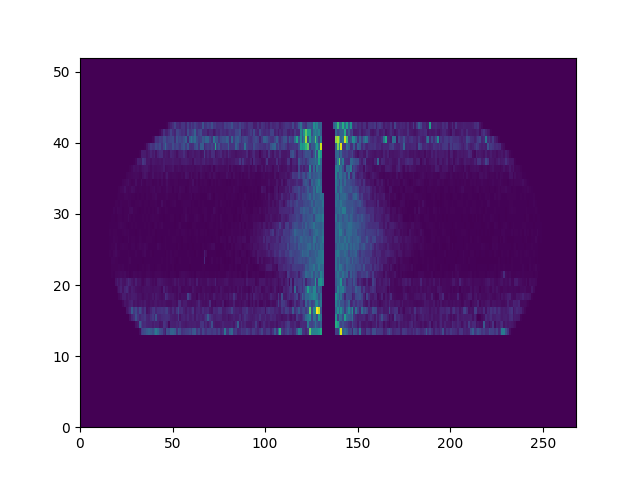

In [14]:
# ts_start = ts - ut.get_seconds(10)
# ts_end = ts + ut.get_seconds(duration + 30)
# tr = client.TimeRange(ts_start, ts_end)

ts_data = get_data(db, 'TsNormAmp', tr, time_converter=subtract_ref_time)

print(ts_data[1])
print(np.shape(ts_data[1][0]))

plt.figure()
plt.pcolormesh(ts_data[1][0])

# plt.figure()
# for 